### Importing BIST30 data and creating dataframe object

In [19]:
# read csv file and turn it into a dataframe
import pandas as pd

df = pd.read_csv('20180101_20180401_bist30.csv')
df

,timestamp,price,short_name
0,2018-01-02 09:00:00+03:00,15.7900,THYAO
1,2018-01-02 10:00:00+03:00,16.0100,THYAO
2,2018-01-02 11:00:00+03:00,16.0500,THYAO
3,2018-01-02 12:00:00+03:00,16.0500,THYAO
4,2018-01-02 13:00:00+03:00,16.0600,THYAO
...,...,...,...
19194,2018-03-30 14:00:00+03:00,2.5727,YKBNK
19195,2018-03-30 15:00:00+03:00,2.5389,YKBNK
19196,2018-03-30 16:00:00+03:00,2.4715,YKBNK
19197,2018-03-30 17:00:00+03:00,2.4883,YKBNK


### Seperating stocks into smaller dataframes

In [20]:
# get uniqe values in short_name column
stock_names = df['short_name'].unique()
stock_names

array(['THYAO', 'AKBNK', 'ARCLK', 'ASELS', 'BIMAS', 'DOHOL', 'EKGYO',
       'EREGL', 'FROTO', 'GUBRF', 'GARAN', 'KRDMD', 'KCHOL', 'KOZAL',
       'KOZAA', 'PGSUS', 'PETKM', 'SAHOL', 'SASA', 'SISE', 'TAVHL',
       'TKFEN', 'TUPRS', 'TTKOM', 'TCELL', 'HALKB', 'ISCTR', 'VAKBN',
       'VESTL', 'YKBNK'], dtype=object)

In [21]:
# for each name in stock_names, create a new dataframe f'df_{name}' = df[df['short_name'] == name]
lst = []
for name in stock_names:
    globals()[f'df_{name}'] = df[df['short_name'] == name]
    # append the name of dataframe to lst
    lst.append(f'df_{name}')

    

In [22]:
# for each dataframe with names in lst, change column name price to name of the stock withput df_
for i in lst:
    globals()[i].rename(columns={'price':i[3:]}, inplace=True)
    # drop short_name column
    globals()[i].drop('short_name', axis=1, inplace=True)

    

/var/folders/bp/2cz163b912j919tv5pxzd0l40000gn/T/ipykernel_12185/2180318799.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[i].rename(columns={'price':i[3:]}, inplace=True)
/var/folders/bp/2cz163b912j919tv5pxzd0l40000gn/T/ipykernel_12185/2180318799.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[i].drop('short_name', axis=1, inplace=True)
/var/folders/bp/2cz163b912j919tv5pxzd0l40000gn/T/ipykernel_12185/2180318799.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [23]:
df_AKBNK

,timestamp,AKBNK
640,2018-01-02 09:00:00+03:00,6.9475
641,2018-01-02 10:00:00+03:00,7.0602
642,2018-01-02 11:00:00+03:00,7.0954
643,2018-01-02 12:00:00+03:00,7.0814
644,2018-01-02 13:00:00+03:00,7.1024
...,...,...
1275,2018-03-30 14:00:00+03:00,7.0846
1276,2018-03-30 15:00:00+03:00,7.0625
1277,2018-03-30 16:00:00+03:00,7.0552
1278,2018-03-30 17:00:00+03:00,7.0479


### Merging dataframes into one main dataframe on date and time

In [34]:
# iterate over lst and merge all dataframes outer on timestamp column
df_merged = globals()[lst[0]]
for i in lst[1:]:
    df_merged = df_merged.merge(globals()[i], on='timestamp', how='outer')
    df_merged_drop = df_merged.drop('timestamp', axis=1)

df_merged_drop

,THYAO,AKBNK,ARCLK,ASELS,BIMAS,DOHOL,EKGYO,EREGL,FROTO,GUBRF,...,TAVHL,TKFEN,TUPRS,TTKOM,TCELL,HALKB,ISCTR,VAKBN,VESTL,YKBNK
0,15.79,6.9475,18.4146,7.9405,31.8609,0.7028,2.3141,6.0021,42.0959,4.20,...,18.4807,12.7352,12.2392,4.9603,12.1212,10.5358,2.6331,6.6842,5.9926,2.4490
1,16.01,7.0602,18.4999,7.9549,32.2076,0.7110,2.3387,6.0199,42.3053,4.19,...,18.6442,12.7952,12.3095,5.0726,12.1604,10.8577,2.6444,6.7927,6.1659,2.4659
2,16.05,7.0954,18.3804,7.9405,32.0850,0.7110,2.3306,5.9962,42.6195,4.22,...,18.5788,12.6978,12.2894,5.0726,12.0586,10.8382,2.6444,6.8715,6.4809,2.4828
3,16.05,7.0814,18.3633,7.9694,31.9017,0.7110,2.3387,5.9962,42.7939,4.25,...,18.6278,12.5855,12.2995,5.0565,12.0509,10.7406,2.6369,6.8715,6.5202,2.4828
4,16.06,7.1024,18.3633,7.9742,32.0443,0.7189,2.3387,6.0080,42.6544,4.26,...,18.6278,12.5855,12.3195,5.0565,12.1057,10.7601,2.6369,6.8814,6.5202,2.4828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,19.44,7.0846,15.8482,7.4765,29.3520,1.0501,2.0762,6.1975,43.1081,4.17,...,20.3519,12.8325,12.4861,5.3936,11.8314,8.8091,2.6969,6.4772,9.2370,2.5727
636,19.32,7.0625,15.8393,7.4813,29.3111,1.0663,2.0844,6.1975,43.0732,4.17,...,20.3177,12.7801,12.2937,5.3777,11.8469,8.7896,2.6969,6.4476,9.0952,2.5389
637,19.17,7.0552,15.8305,7.4717,29.3927,1.0742,2.0679,6.1917,43.1779,4.14,...,20.3177,12.8102,12.2370,5.3695,11.8550,8.7700,2.6856,6.4377,9.0637,2.4715
638,19.20,7.0479,15.8482,7.4861,29.3314,1.0906,2.0762,6.2213,43.3176,4.13,...,20.2663,12.7952,12.3163,5.3536,11.8628,8.7700,2.6856,6.4377,9.1898,2.4883


### Correlation between dataframes and highly correlated stocks

In [35]:
correlation_matrix = df_merged_drop.corr()

threshold = 0.85  # Adjust as needed
highly_correlated_pairs = [(stock1, stock2) for stock1 in correlation_matrix.columns 
                           for stock2 in correlation_matrix.columns 
                           if stock1 < stock2 and correlation_matrix.loc[stock1, stock2] > threshold]

correlation_matrix

,THYAO,AKBNK,ARCLK,ASELS,BIMAS,DOHOL,EKGYO,EREGL,FROTO,GUBRF,...,TAVHL,TKFEN,TUPRS,TTKOM,TCELL,HALKB,ISCTR,VAKBN,VESTL,YKBNK
THYAO,1.000000,0.041390,-0.695925,-0.583521,-0.489627,0.321957,-0.524697,0.756429,0.462502,-0.292104,...,0.700495,0.791250,0.153840,0.557524,-0.203168,-0.741775,0.046413,-0.188818,0.749305,0.444717
AKBNK,0.041390,1.000000,-0.285994,0.306903,-0.025084,-0.417413,-0.155080,0.121462,0.334152,0.674753,...,-0.086480,0.141421,-0.566434,0.075107,0.572154,0.020825,0.933228,0.905183,0.107699,0.739624
ARCLK,-0.695925,-0.285994,1.000000,0.560720,0.671962,-0.033071,0.822769,-0.461525,-0.242909,0.017699,...,-0.430463,-0.572142,0.431636,-0.360996,0.089512,0.903795,-0.372058,-0.086480,-0.691842,-0.564744
ASELS,-0.583521,0.306903,0.560720,1.000000,0.390654,-0.154324,0.457144,-0.493571,-0.151569,0.498469,...,-0.600383,-0.579025,-0.021226,-0.502470,0.454716,0.752414,0.221760,0.420776,-0.370773,-0.080709
BIMAS,-0.489627,-0.025084,0.671962,0.390654,1.000000,-0.291919,0.754124,0.053446,0.233724,0.010206,...,-0.007631,-0.209887,0.240069,0.099819,0.180527,0.644221,-0.053390,0.102670,-0.574147,-0.163376
DOHOL,0.321957,-0.417413,-0.033071,-0.154324,-0.291919,1.000000,-0.049183,0.037249,0.137454,-0.567590,...,0.405683,-0.028223,0.681903,0.172663,-0.054849,-0.215675,-0.323642,-0.495305,0.591427,-0.291946
EKGYO,-0.524697,-0.155080,0.822769,0.457144,0.754124,-0.049183,1.000000,-0.183886,0.061665,-0.039223,...,-0.205719,-0.377635,0.459628,-0.052612,0.073973,0.778450,-0.183184,0.041414,-0.552095,-0.424310
EREGL,0.756429,0.121462,-0.461525,-0.493571,0.053446,0.037249,-0.183886,1.000000,0.675457,-0.280098,...,0.812808,0.819236,0.196474,0.740307,-0.096531,-0.510166,0.118453,-0.015102,0.459453,0.513967
FROTO,0.462502,0.334152,-0.242909,-0.151569,0.233724,0.137454,0.061665,0.675457,1.000000,-0.179770,...,0.684482,0.412797,0.196288,0.813547,0.414516,-0.231793,0.397692,0.202071,0.411231,0.431066
GUBRF,-0.292104,0.674753,0.017699,0.498469,0.010206,-0.567590,-0.039223,-0.280098,-0.179770,1.000000,...,-0.563164,-0.143417,-0.552088,-0.414960,0.278220,0.275552,0.551146,0.702344,-0.230118,0.433624


### Linear Regression model between highly correlated stocks

In [36]:
from sklearn.linear_model import LinearRegression

trading_pairs = []  # List to store trading pairs

for pair in highly_correlated_pairs:
    pair_data = df_merged[['timestamp', pair[0], pair[1]]].dropna()
    
    X = pair_data[pair[0]].values.reshape(-1, 1)
    y = pair_data[pair[1]].values

    model = LinearRegression()
    model.fit(X, y)

    trading_pairs.append({'pair': pair, 'model': model, 'data': pair_data})


In [38]:
trading_pairs

[{'pair': ('AKBNK', 'GARAN'),
  'model': LinearRegression(),
  'data':                      timestamp   AKBNK   GARAN
  0    2018-01-02 09:00:00+03:00  6.9475  9.2047
  1    2018-01-02 10:00:00+03:00  7.0602  9.3157
  2    2018-01-02 11:00:00+03:00  7.0954  9.3414
  3    2018-01-02 12:00:00+03:00  7.0814  9.3242
  4    2018-01-02 13:00:00+03:00  7.1024  9.3328
  ..                         ...     ...     ...
  635  2018-03-30 14:00:00+03:00  7.0846  9.4181
  636  2018-03-30 15:00:00+03:00  7.0625  9.3670
  637  2018-03-30 16:00:00+03:00  7.0552  9.3584
  638  2018-03-30 17:00:00+03:00  7.0479  9.3755
  639  2018-03-30 18:00:00+03:00  7.0185  9.3414
  
  [640 rows x 3 columns],
  'residuals': 0     -0.008683
  1     -0.087778
  2     -0.121452
  3     -0.115037
  4     -0.141859
           ...   
  635   -0.026535
  636   -0.040358
  637   -0.036645
  638   -0.007232
  639    0.008258
  Name: GARAN, Length: 640, dtype: float64,
  'upper_limit': 0.3111104988303155,
  'lower_limit': -0.31

### Trigger limits for trading

In [39]:
for pair_info in trading_pairs:
    pair_info['residuals'] = pair_info['data'][pair_info['pair'][1]] - pair_info['model'].predict(pair_info['data'][pair_info['pair'][0]].values.reshape(-1, 1))

# Assuming constant variance assumption
for pair_info in trading_pairs:
    mean_residuals = pair_info['residuals'].mean()
    std_residuals = pair_info['residuals'].std()

    # Set control limits
    pair_info['upper_limit'] = mean_residuals + 2 * std_residuals
    pair_info['lower_limit'] = mean_residuals - 2 * std_residuals


### Trading simulation

In [41]:
trading_capital = 1000  # Initial trading capital
position_size = 100  # Number of shares to trade for each signal

for pair_info in trading_pairs:
    signals = []

    for i, residual in enumerate(pair_info['residuals']):
        if residual > pair_info['upper_limit']:
            signals.append(-1)  # Short signal
        elif residual < pair_info['lower_limit']:
            signals.append(1)  # Long signal
        else:
            signals.append(0)  # No signal

    # Assuming equal capital allocation for each pair
    capital_per_pair = trading_capital / len(trading_pairs)

    # Trading simulation
    for i in range(1, len(signals)):
        if signals[i] != signals[i-1]:
            if signals[i] == 1:
                # Buy the underperforming stock
                capital_per_pair -= position_size * pair_info['data'][pair_info['pair'][1]].iloc[i]
            elif signals[i] == -1:
                # Short sell the outperforming stock
                capital_per_pair += position_size * pair_info['data'][pair_info['pair'][1]].iloc[i]

    print(f"Potential gains for pair {pair_info['pair']}: ${capital_per_pair - trading_capital}")

Potential gains for pair ('AKBNK', 'GARAN'): $5410.091111111111
Potential gains for pair ('AKBNK', 'ISCTR'): $-1349.868888888889
Potential gains for pair ('AKBNK', 'VAKBN'): $-3468.9188888888884
Potential gains for pair ('ARCLK', 'HALKB'): $-1779.5488888888888
Potential gains for pair ('GARAN', 'ISCTR'): $-1340.4988888888888
Potential gains for pair ('KRDMD', 'TAVHL'): $13015.731111111112
Potential gains for pair ('KOZAA', 'KOZAL'): $-1047.4588888888889
Potential gains for pair ('HALKB', 'KCHOL'): $-3630.698888888889
Potential gains for pair ('ISCTR', 'VAKBN'): $-1462.658888888889


Part 2 with Time Series on Resudials Approach

('AKBNK', 'GARAN')


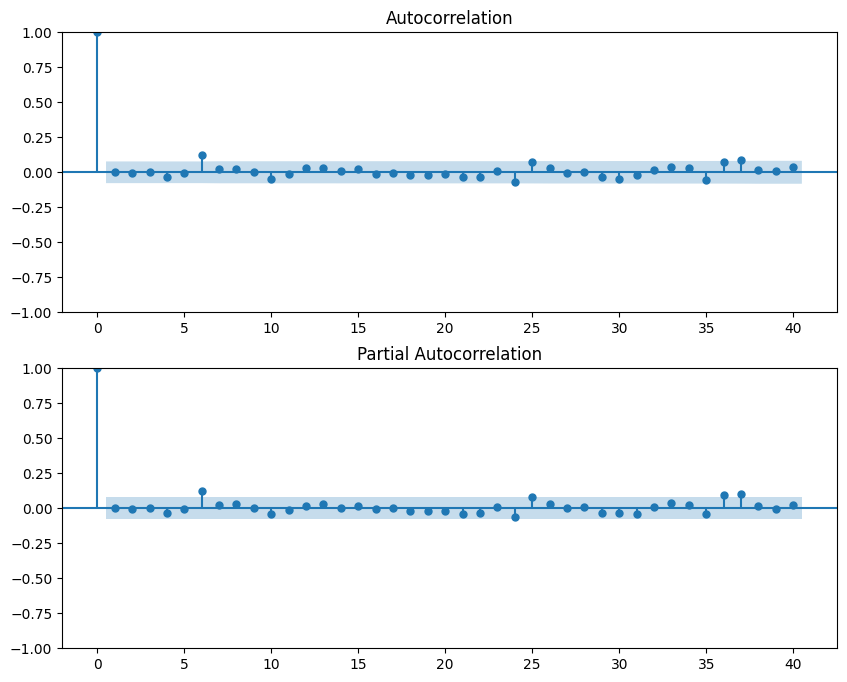

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-2443.219, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-2451.171, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-2449.185, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-2449.171, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-2447.171, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-2449.171, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.172 seconds


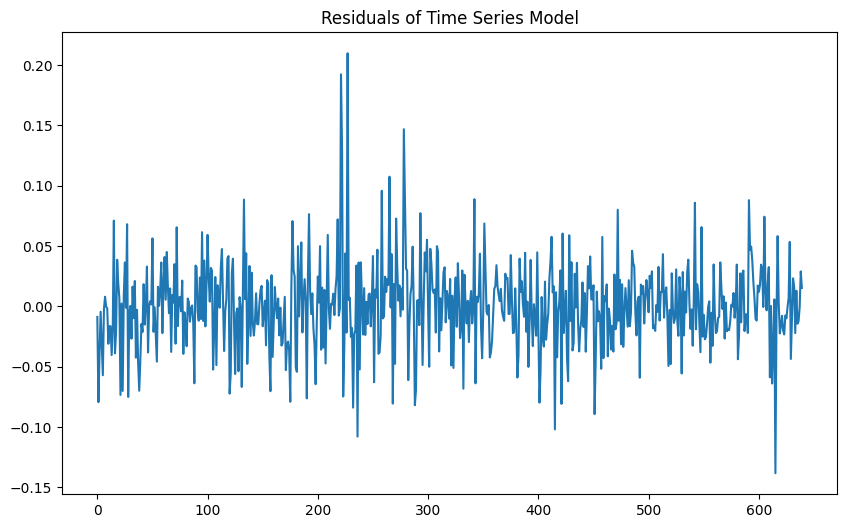

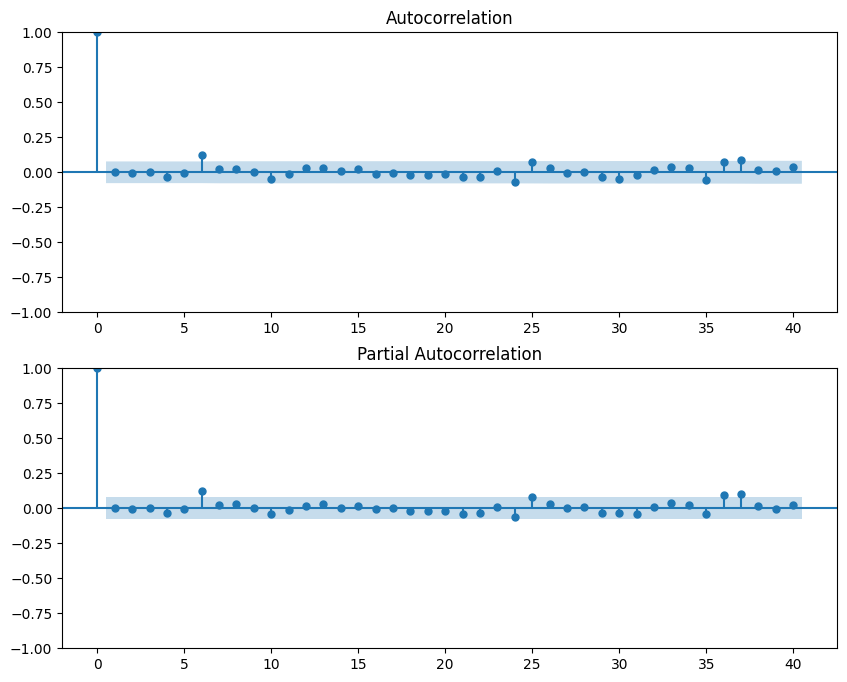

('AKBNK', 'ISCTR')


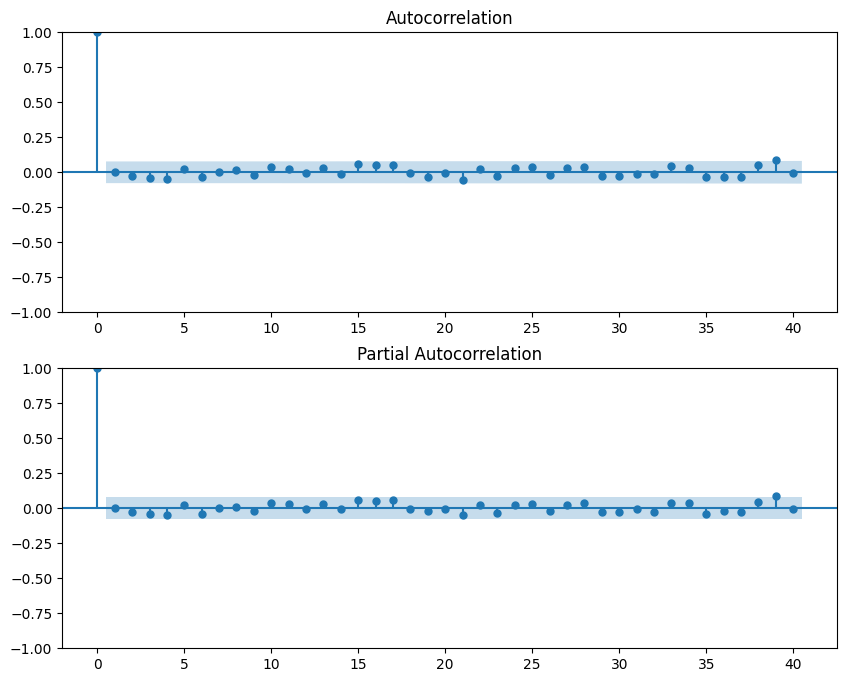

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-3588.188, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3594.745, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-3592.762, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-3592.737, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-3590.745, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3592.745, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.176 seconds


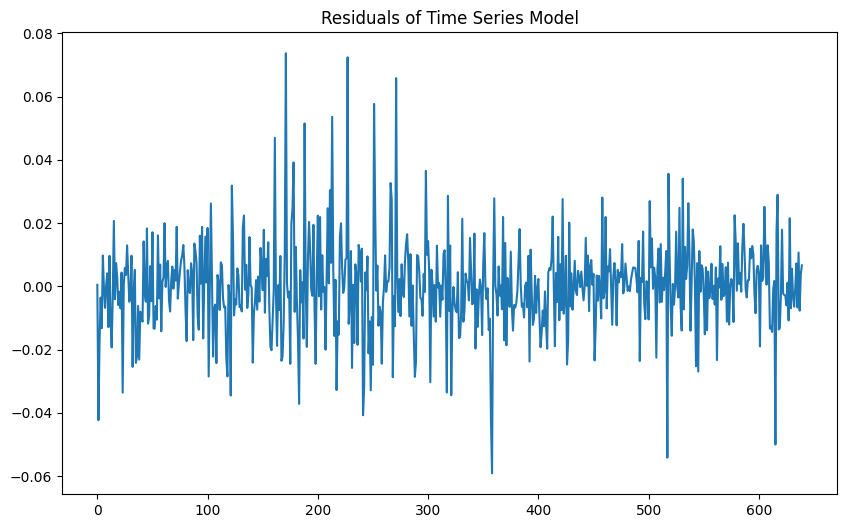

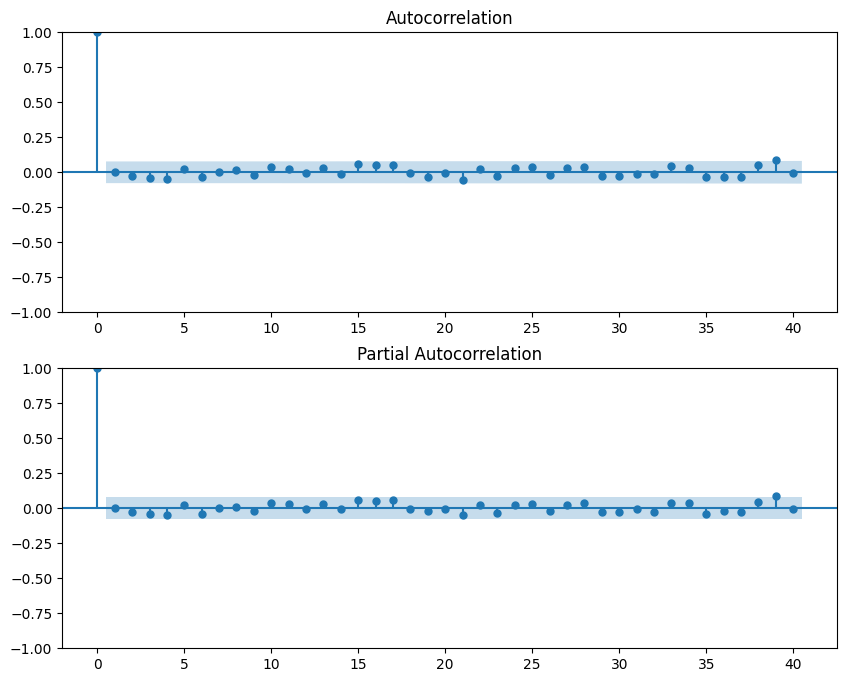

('AKBNK', 'VAKBN')


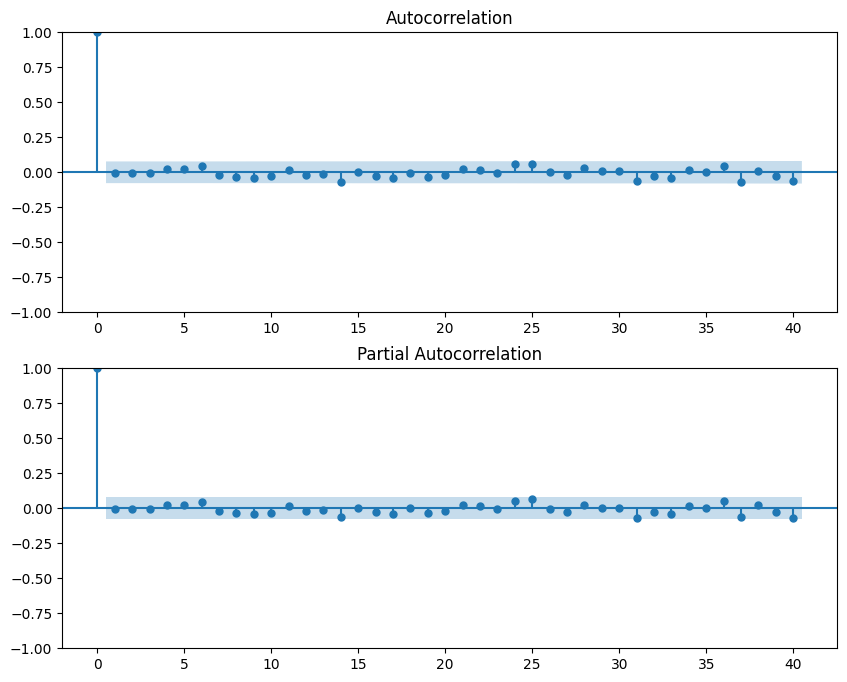

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-2578.370, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-2586.346, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-2584.368, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-2584.350, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-2582.368, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-2584.346, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.168 seconds


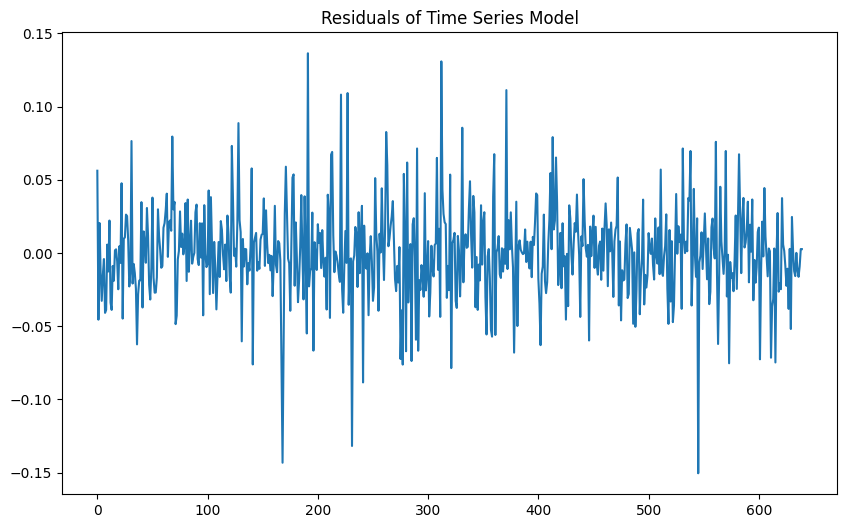

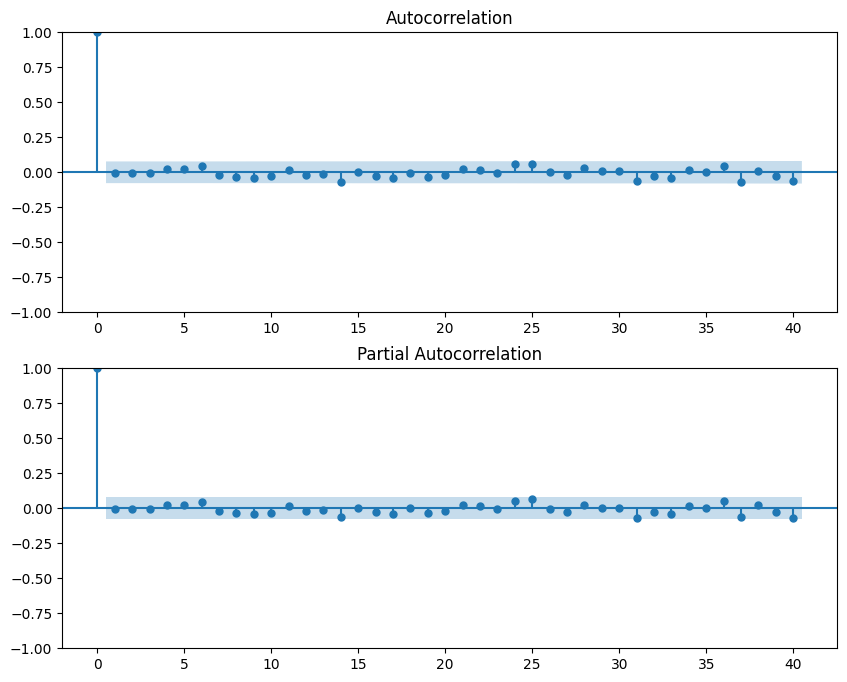

('ARCLK', 'HALKB')


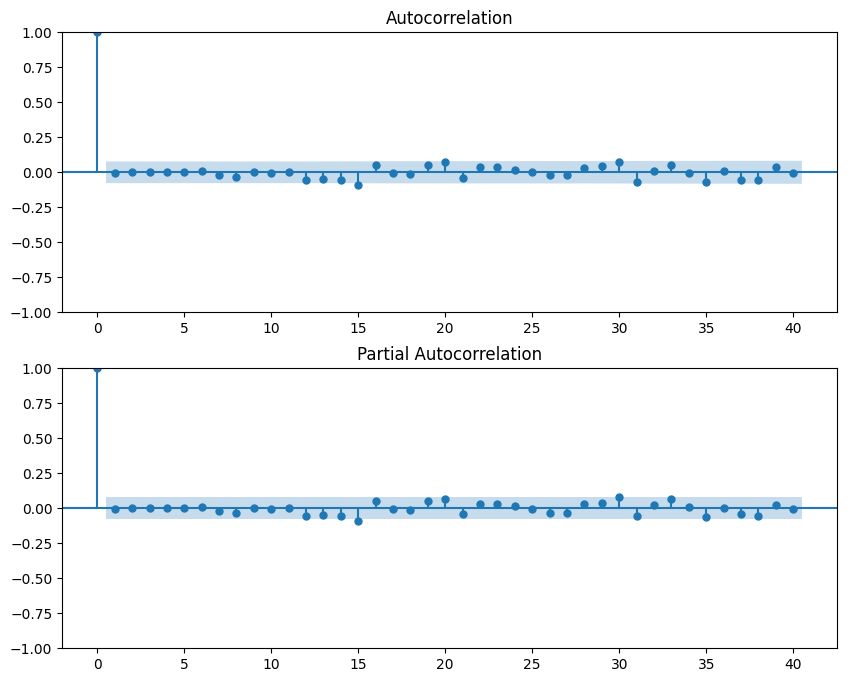

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-1942.768, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1950.745, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-1948.749, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-1948.749, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1946.753, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1948.745, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.239 seconds


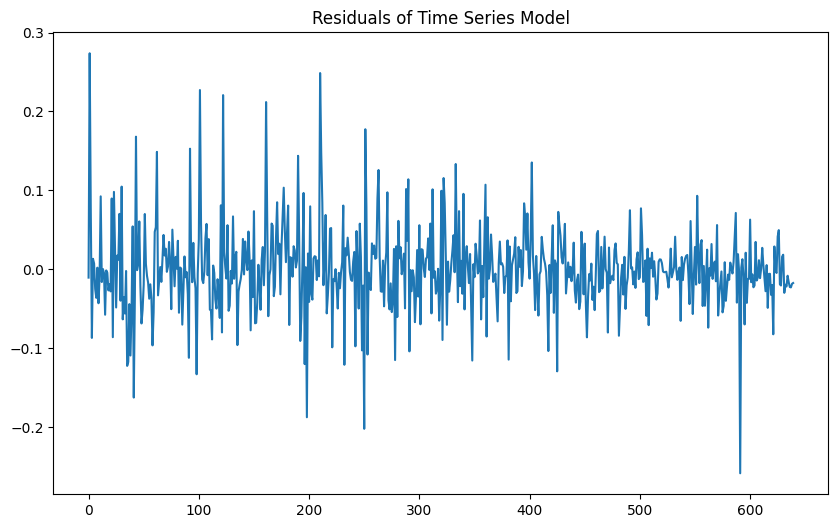

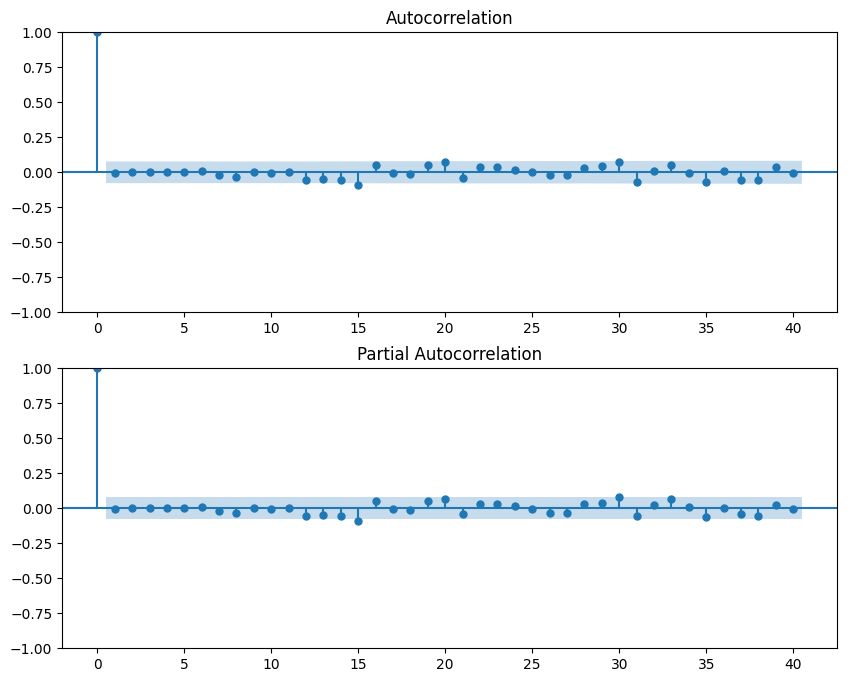

('GARAN', 'ISCTR')


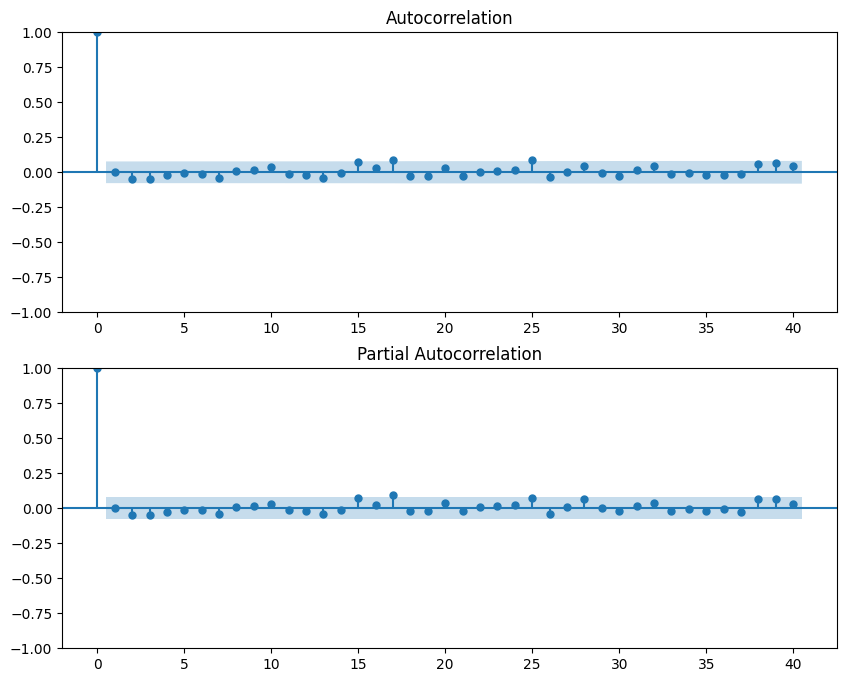

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-3676.095, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3680.841, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-3678.845, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-3678.831, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-3676.841, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3678.841, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.194 seconds


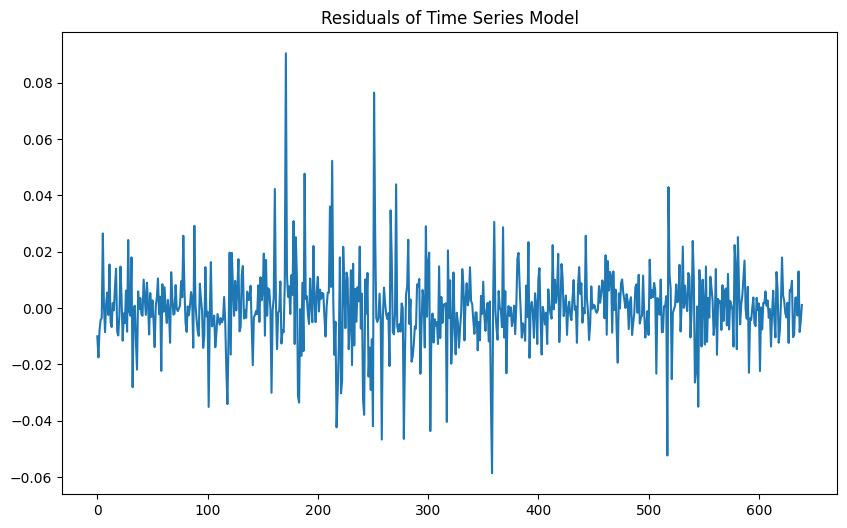

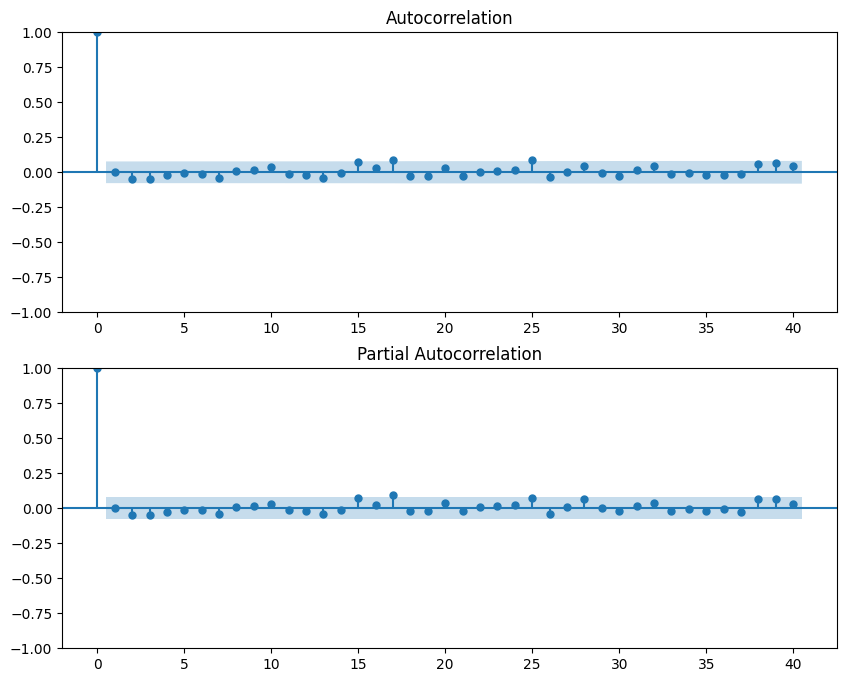

('KRDMD', 'TAVHL')


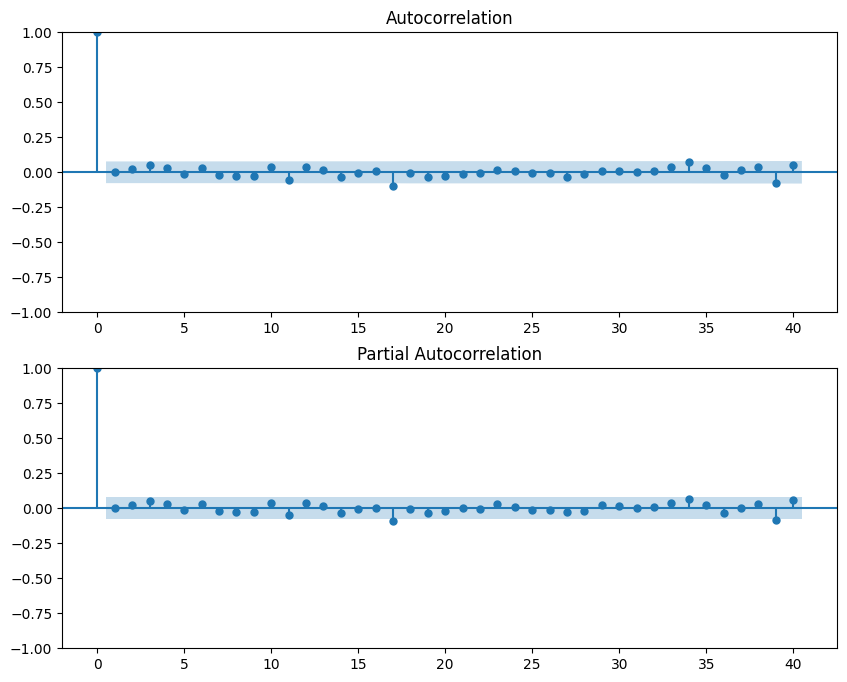

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-862.242, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-860.242, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-860.242, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-858.242, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-860.242, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.320 seconds


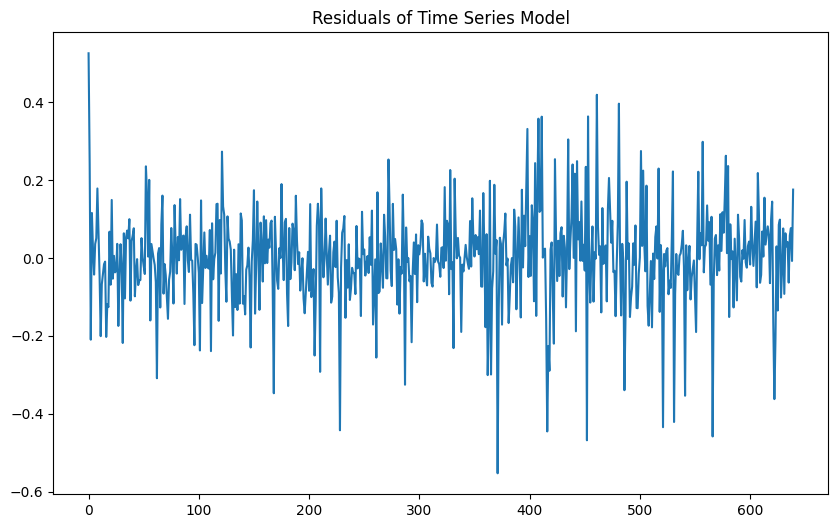

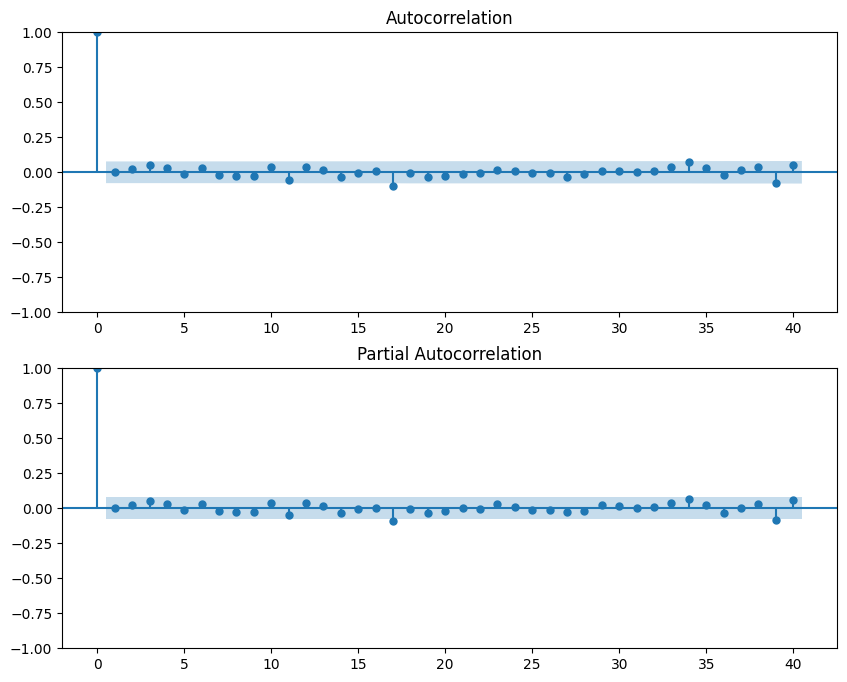

('KOZAA', 'KOZAL')


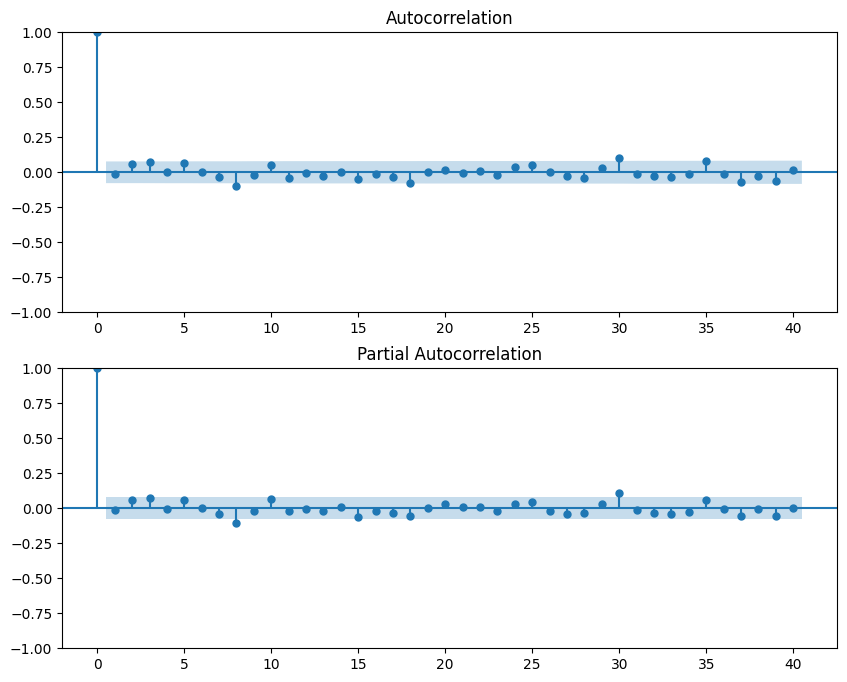

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-3744.411, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3749.702, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-3747.863, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-3747.786, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-3745.702, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3747.702, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.168 seconds


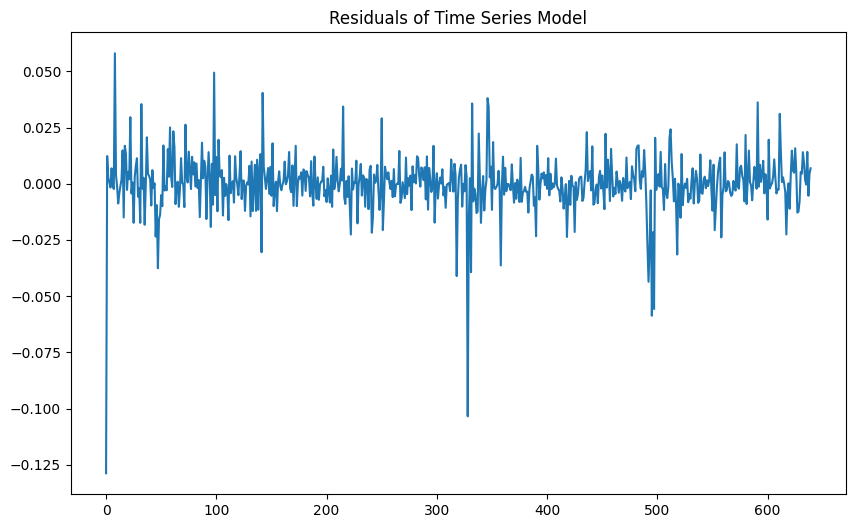

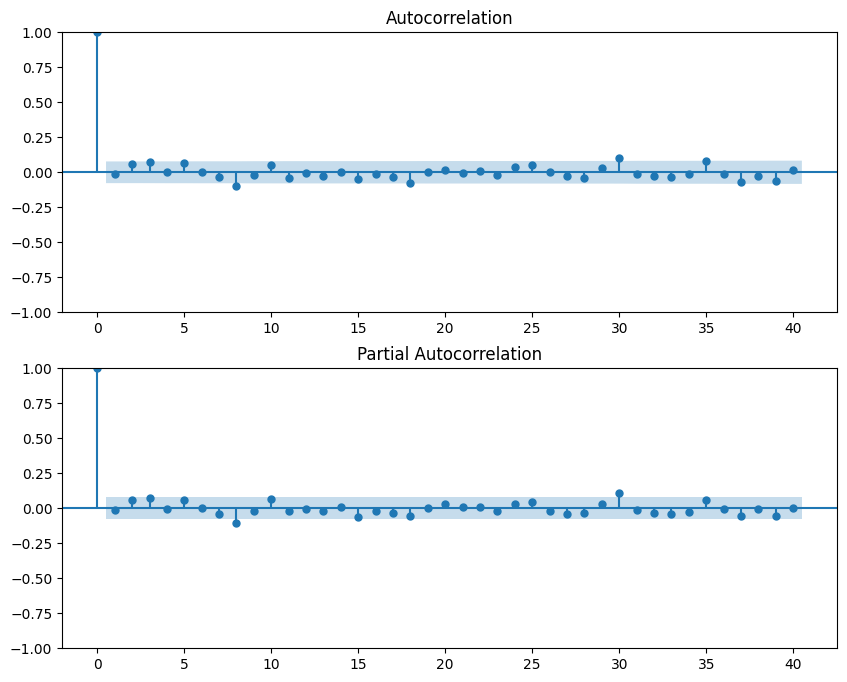

('HALKB', 'KCHOL')


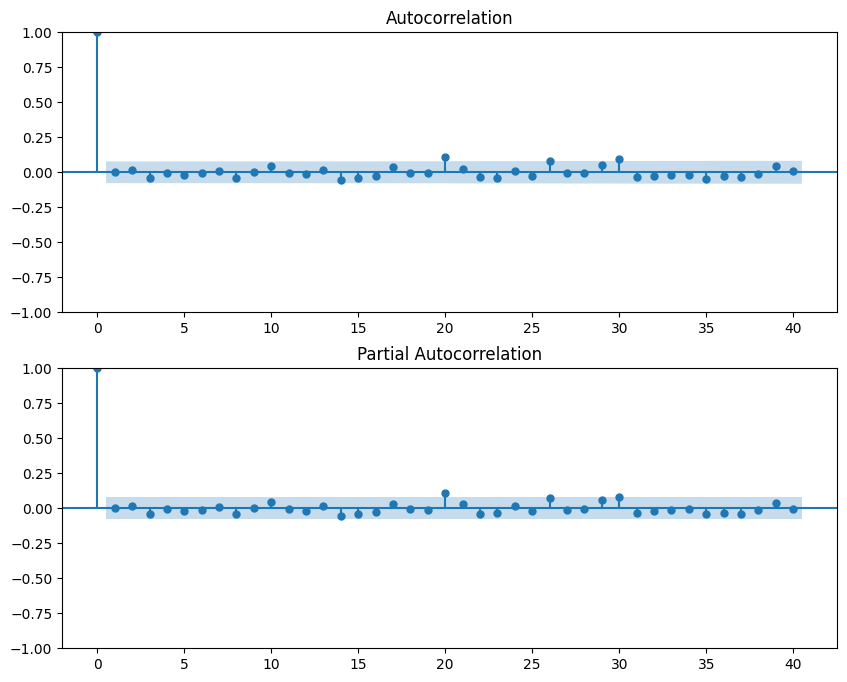

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-1335.428, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1339.824, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-1337.824, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-1337.824, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1335.824, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1337.824, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.280 seconds


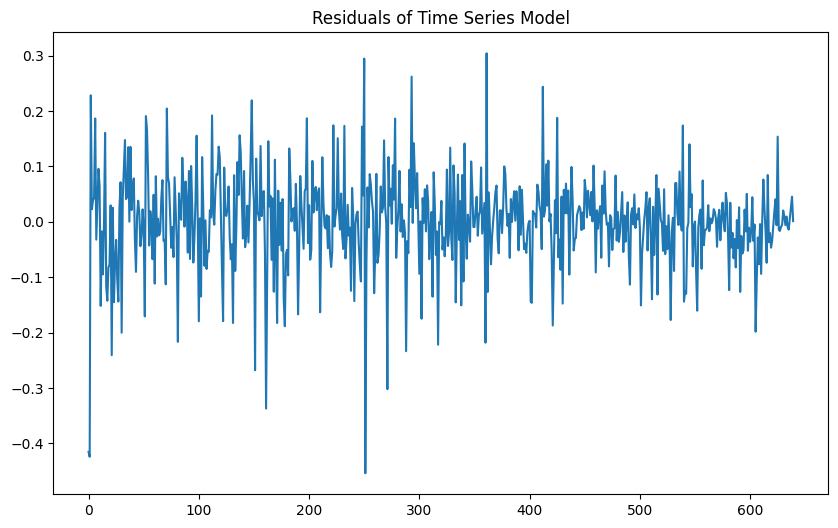

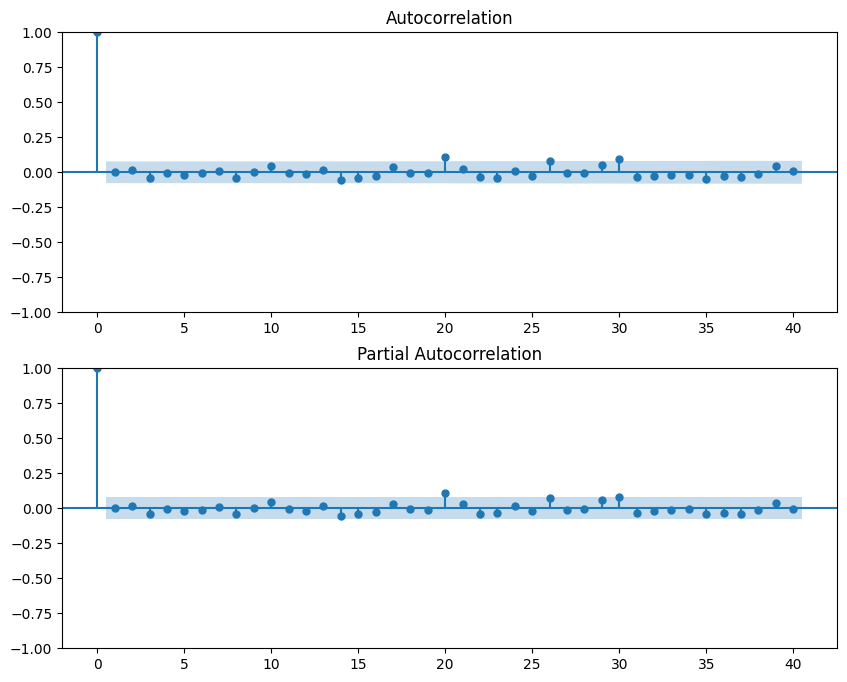

('ISCTR', 'VAKBN')


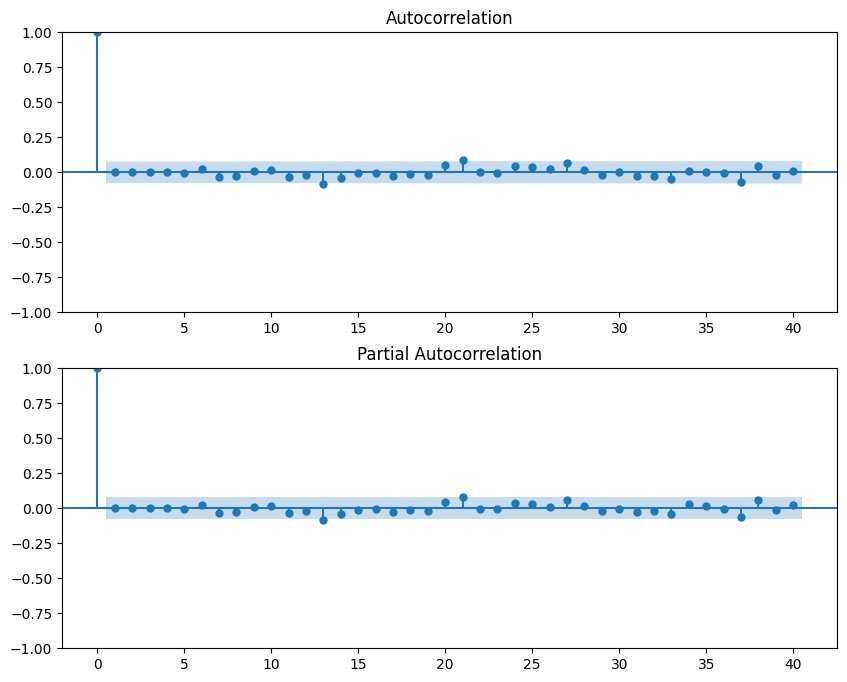

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-2573.305, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-2581.305, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-2579.307, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-2579.307, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-2577.585, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-2579.305, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.164 seconds


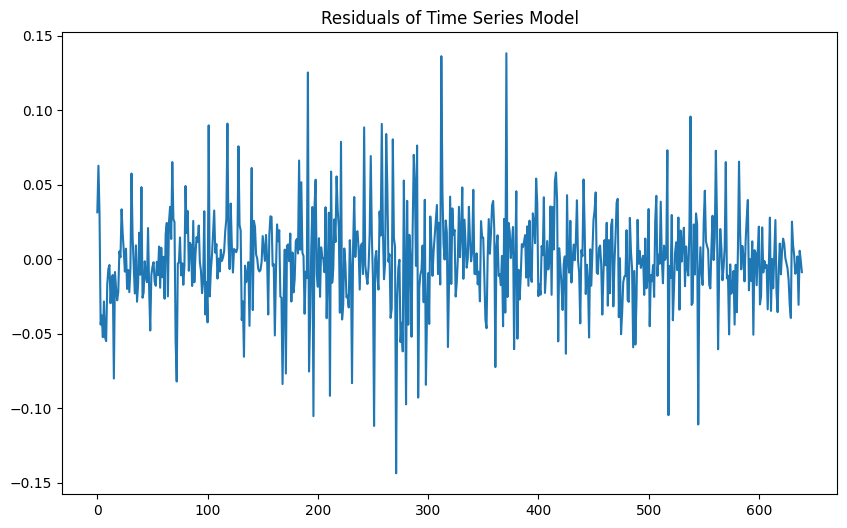

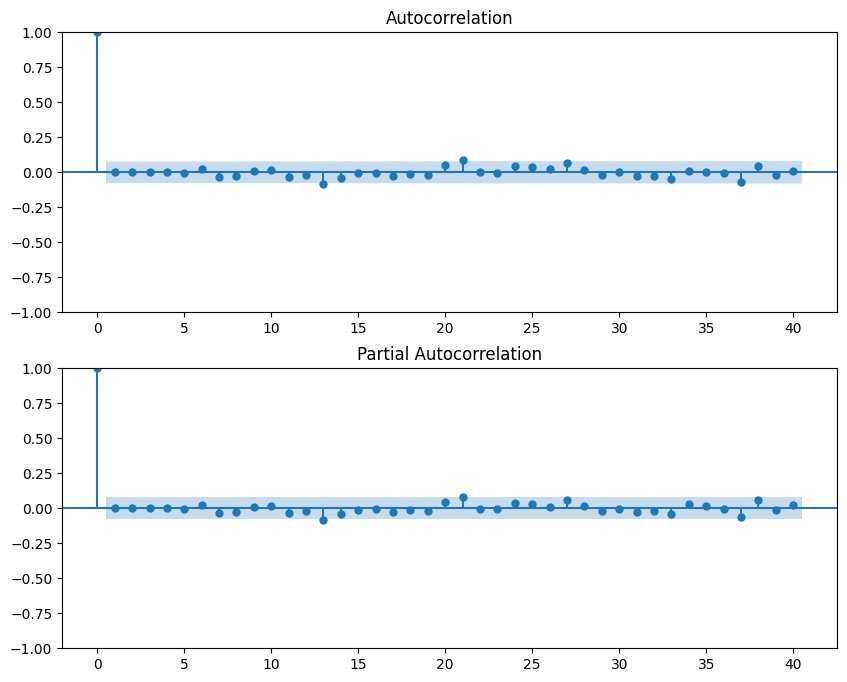

In [73]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pmdarima import auto_arima

for pair_info in trading_pairs:
    print(pair_info['pair'])
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    sm.graphics.tsa.plot_acf(pair_info['residuals'], lags=40, ax=ax1)
    sm.graphics.tsa.plot_pacf(pair_info['residuals'], lags=40, ax=ax2)
    plt.show()

# Auto ARIMA
    auto_arima_model = auto_arima(pair_info['residuals'], seasonal=False, trace=True, suppress_warnings=True)
    order = auto_arima_model.order

    model = sm.tsa.ARIMA(pair_info['residuals'], order=order)
    results = model.fit()

    pair_info['residuals'] = results.resid
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(pair_info['residuals'])
    ax.set_title('Residuals of Time Series Model')
    plt.show()

# Check ACF and PACF of residuals
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    sm.graphics.tsa.plot_acf(pair_info['residuals'], lags=40, ax=ax1)
    sm.graphics.tsa.plot_pacf(pair_info['residuals'], lags=40, ax=ax2)
    plt.show()

In [74]:
for pair_info in trading_pairs:
    mean_residuals = pair_info['residuals'].mean()
    std_residuals = pair_info['residuals'].std()

    # Set control limits
    pair_info['upper_limit'] = mean_residuals + 2 * std_residuals
    pair_info['lower_limit'] = mean_residuals - 2 * std_residuals


In [75]:
trading_capital = 1000  # Initial trading capital
position_size = 100  # Number of shares to trade for each signal

for pair_info in trading_pairs:
    signals = []

    for i, residual in enumerate(pair_info['residuals']):
        if residual > pair_info['upper_limit']:
            signals.append(-1)  # Short signal
        elif residual < pair_info['lower_limit']:
            signals.append(1)  # Long signal
        else:
            signals.append(0)  # No signal

    # Assuming equal capital allocation for each pair
    capital_per_pair = trading_capital / len(trading_pairs)

    # Trading simulation
    for i in range(1, len(signals)):
        if signals[i] != signals[i-1]:
            if signals[i] == 1:
                # Buy the underperforming stock
                capital_per_pair -= position_size * pair_info['data'][pair_info['pair'][1]].iloc[i]
            elif signals[i] == -1:
                # Short sell the outperforming stock
                capital_per_pair += position_size * pair_info['data'][pair_info['pair'][1]].iloc[i]

    print(f"Potential gains for pair {pair_info['pair']}: ${capital_per_pair - trading_capital}")

Potential gains for pair ('AKBNK', 'GARAN'): $-1736.8188888888878
Potential gains for pair ('AKBNK', 'ISCTR'): $-456.78888888888923
Potential gains for pair ('AKBNK', 'VAKBN'): $2916.5911111111122
Potential gains for pair ('ARCLK', 'HALKB'): $327.59111111111133
Potential gains for pair ('GARAN', 'ISCTR'): $-1607.168888888889
Potential gains for pair ('KRDMD', 'TAVHL'): $-9320.998888888887
Potential gains for pair ('KOZAA', 'KOZAL'): $-418.8188888888892
Potential gains for pair ('HALKB', 'KCHOL'): $-5142.12888888889
Potential gains for pair ('ISCTR', 'VAKBN'): $1980.9911111111114


Part 2 Time Series on Prices Approach

In [100]:
for stock in df_merged[stock_names]:
    df_merged[stock].fillna(df_merged[stock].mean(), inplace=True)
    auto_arima_model = auto_arima(df_merged[stock], seasonal=False, trace=True, suppress_warnings=True)
    order = auto_arima_model.order

    model = sm.tsa.ARIMA(df_merged[stock], order=order)
    results = model.fit()

    df_merged[stock] = results.resid
    

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-857.442, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-858.893, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-858.843, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-858.589, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-859.758, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-858.307, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.384 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2372.290, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2375.682, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2376.480, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2376.608, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2377.677, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2375.534, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-765.834, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-763.830, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-763.094, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-763.272, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-765.261, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-761.721, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-761.728, Time=0.07 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-757.732, Time=0.15 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-757.748, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-762.812, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-759.742, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-759.696, Time=0.08 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-760.079, Time=0.42 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.21 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 1.918 seconds


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-3965.483, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-3518.102, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-3703.152, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-3976.815, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-3520.102, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-3966.021, Time=0.10 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-3979.160, Time=0.23 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-3974.591, Time=0.15 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-3964.869, Time=0.11 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-3979.616, Time=0.33 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=-3974.544, Time=0.32 sec
 ARIMA(1,2,4)(0,0,0)[0] intercept   : AIC=-3974.915, Time=0.44 sec
 ARIMA(0,2,4)(0,0,0)[0] intercept   : AIC=-3976.607, Time=0.33 sec
 ARIMA(2,2,4)(0,0,0)[0] intercept   : AIC=-3972.514, Time=0.41 sec
 ARIMA(1,2,3)(0,0,0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2937.014, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2933.225, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.339 seconds
Performing stepwise search to minimize aic


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1922.911, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1924.372, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1926.488, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1926.330, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1926.361, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1924.657, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1924.585, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1922.488, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1928.478, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-1926.646, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1926.576, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1928.320, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1924.478, Time=0.06 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.877 seconds
Performing stepwise search to minimize aic
 ARIMA(2,

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2342.879, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2345.449, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2348.863, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2348.872, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2347.173, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2346.877, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-2346.876, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-2344.879, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-2350.534, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-2348.542, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-2348.543, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-2350.532, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-2346.544, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.569 seconds
Performin

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2797.329, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2797.861, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2797.337, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-2801.850, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-2799.096, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2804.173, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2799.711, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-2798.101, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-2807.502, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-2799.511, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-2798.965, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-2805.608, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-2803.072, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-2800.673, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-2799.683, Time=0.03

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1386.021, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1390.556, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1388.779, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1388.776, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1392.556, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1386.777, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.475 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2005.900, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2003.783, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2008.379, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2009.339, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2005.782, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2009.780, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2007.851, Time=0.05 sec
 ARIMA(1,

In [101]:
df_merged_drop = df_merged.drop('timestamp', axis=1)

In [102]:
correlation_matrix = df_merged_drop.corr()

threshold = 0.85  # Adjust as needed
highly_correlated_pairs = [(stock1, stock2) for stock1 in correlation_matrix.columns 
                           for stock2 in correlation_matrix.columns 
                           if stock1 < stock2 and correlation_matrix.loc[stock1, stock2] > threshold]

correlation_matrix

,THYAO,AKBNK,ARCLK,ASELS,BIMAS,DOHOL,EKGYO,EREGL,FROTO,GUBRF,...,TAVHL,TKFEN,TUPRS,TTKOM,TCELL,HALKB,ISCTR,VAKBN,VESTL,YKBNK
THYAO,1.000000,0.983487,0.981142,0.980739,0.978526,0.837300,0.981359,0.980564,0.975345,0.982950,...,0.976297,0.975404,0.981812,0.974739,0.976763,0.984569,0.980242,0.980930,0.947949,0.980921
AKBNK,0.983487,1.000000,0.991465,0.987979,0.989150,0.840181,0.990325,0.989250,0.984714,0.990456,...,0.985915,0.984880,0.990830,0.986381,0.988255,0.992308,0.991601,0.992489,0.949260,0.990925
ARCLK,0.981142,0.991465,1.000000,0.990101,0.992086,0.845610,0.991175,0.989567,0.985852,0.990077,...,0.986918,0.986199,0.993748,0.986828,0.990496,0.991987,0.986232,0.988269,0.944806,0.988462
ASELS,0.980739,0.987979,0.990101,1.000000,0.988717,0.847763,0.987704,0.986560,0.983813,0.987487,...,0.984079,0.982641,0.990212,0.981939,0.985367,0.990107,0.983901,0.985874,0.943323,0.986325
BIMAS,0.978526,0.989150,0.992086,0.988717,1.000000,0.843894,0.988556,0.986914,0.984876,0.987060,...,0.989296,0.985741,0.990640,0.985324,0.986854,0.990223,0.983396,0.985788,0.941798,0.985576
DOHOL,0.837300,0.840181,0.845610,0.847763,0.843894,1.000000,0.842057,0.844682,0.838854,0.846569,...,0.842356,0.841690,0.847011,0.833326,0.846201,0.837576,0.842561,0.841188,0.810306,0.844927
EKGYO,0.981359,0.990325,0.991175,0.987704,0.988556,0.842057,1.000000,0.987779,0.984077,0.987788,...,0.984540,0.981557,0.990275,0.984035,0.985447,0.991239,0.986943,0.987336,0.941316,0.986773
EREGL,0.980564,0.989250,0.989567,0.986560,0.986914,0.844682,0.987779,1.000000,0.984117,0.987667,...,0.983160,0.981751,0.990156,0.982889,0.986080,0.989908,0.985735,0.986530,0.947336,0.985421
FROTO,0.975345,0.984714,0.985852,0.983813,0.984876,0.838854,0.984077,0.984117,1.000000,0.984497,...,0.980440,0.979692,0.985869,0.979386,0.983247,0.985615,0.980260,0.982750,0.938906,0.982571
GUBRF,0.982950,0.990456,0.990077,0.987487,0.987060,0.846569,0.987788,0.987667,0.984497,1.000000,...,0.983356,0.982913,0.989743,0.983370,0.986790,0.989814,0.986194,0.988056,0.947758,0.987489


In [103]:
from sklearn.linear_model import LinearRegression

trading_pairs = []  # List to store trading pairs

for pair in highly_correlated_pairs:
    pair_data = df_merged[['timestamp', pair[0], pair[1]]].dropna()
    
    X = pair_data[pair[0]].values.reshape(-1, 1)
    y = pair_data[pair[1]].values

    model = LinearRegression()
    model.fit(X, y)

    trading_pairs.append({'pair': pair, 'model': model, 'data': pair_data})

In [104]:
trading_pairs

[{'pair': ('THYAO', 'TKFEN'),
  'model': LinearRegression(),
  'data':                      timestamp         THYAO    TKFEN
  0    2018-01-02 09:00:00+03:00  1.579000e+01  12.7352
  1    2018-01-02 10:00:00+03:00  2.200000e-01   0.0600
  2    2018-01-02 11:00:00+03:00  4.000000e-02  -0.0974
  3    2018-01-02 12:00:00+03:00  4.601830e-11  -0.1123
  4    2018-01-02 13:00:00+03:00  1.000000e-02   0.0000
  ..                         ...           ...      ...
  635  2018-03-30 14:00:00+03:00  1.600000e-01   0.0000
  636  2018-03-30 15:00:00+03:00 -1.200000e-01  -0.0524
  637  2018-03-30 16:00:00+03:00 -1.500000e-01   0.0301
  638  2018-03-30 17:00:00+03:00  3.000000e-02  -0.0150
  639  2018-03-30 18:00:00+03:00 -9.000000e-02  -0.0374
  
  [640 rows x 3 columns]},
 {'pair': ('THYAO', 'TUPRS'),
  'model': LinearRegression(),
  'data':                      timestamp         THYAO      TUPRS
  0    2018-01-02 09:00:00+03:00  1.579000e+01  12.239200
  1    2018-01-02 10:00:00+03:00  2.200000e-

In [105]:
for pair_info in trading_pairs:
    pair_info['residuals'] = pair_info['data'][pair_info['pair'][1]] - pair_info['model'].predict(pair_info['data'][pair_info['pair'][0]].values.reshape(-1, 1))

# Assuming constant variance assumption
for pair_info in trading_pairs:
    mean_residuals = pair_info['residuals'].mean()
    std_residuals = pair_info['residuals'].std()

    # Set control limits
    pair_info['upper_limit'] = mean_residuals + 2 * std_residuals
    pair_info['lower_limit'] = mean_residuals - 2 * std_residuals


In [106]:
trading_capital = 1000  # Initial trading capital
position_size = 100  # Number of shares to trade for each signal

for pair_info in trading_pairs:
    signals = []

    for i, residual in enumerate(pair_info['residuals']):
        if residual > pair_info['upper_limit']:
            signals.append(-1)  # Short signal
        elif residual < pair_info['lower_limit']:
            signals.append(1)  # Long signal
        else:
            signals.append(0)  # No signal

    # Assuming equal capital allocation for each pair
    capital_per_pair = trading_capital / len(trading_pairs)

    # Trading simulation
    for i in range(1, len(signals)):
        if signals[i] != signals[i-1]:
            if signals[i] == 1:
                # Buy the underperforming stock
                capital_per_pair -= position_size * pair_info['data'][pair_info['pair'][1]].iloc[i]
            elif signals[i] == -1:
                # Short sell the outperforming stock
                capital_per_pair += position_size * pair_info['data'][pair_info['pair'][1]].iloc[i]

    print(f"Potential gains for pair {pair_info['pair']}: ${capital_per_pair - trading_capital}")

Potential gains for pair ('THYAO', 'TKFEN'): $-573.9369458128074
Potential gains for pair ('THYAO', 'TUPRS'): $-864.3598131419648
Potential gains for pair ('THYAO', 'TTKOM'): $-833.6256677573379
Potential gains for pair ('THYAO', 'VAKBN'): $-852.6469458128081
Potential gains for pair ('THYAO', 'VESTL'): $-307.72694581280734
Potential gains for pair ('THYAO', 'YKBNK'): $-914.3769458128078
Potential gains for pair ('AKBNK', 'THYAO'): $-81.53694581280865
Potential gains for pair ('AKBNK', 'ARCLK'): $-779.2869458128074
Potential gains for pair ('AKBNK', 'ASELS'): $-756.8369458128079
Potential gains for pair ('AKBNK', 'BIMAS'): $-421.6514798442678
Potential gains for pair ('AKBNK', 'EKGYO'): $-959.5706928671709
Potential gains for pair ('AKBNK', 'EREGL'): $-802.0969458128077
Potential gains for pair ('AKBNK', 'FROTO'): $904.783054187194
Potential gains for pair ('AKBNK', 'GUBRF'): $-872.5369458128083
Potential gains for pair ('AKBNK', 'GARAN'): $-756.8076348413147
Potential gains for pair (